In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/influencer-marketing-roi-dataset/influencer_marketing_roi_dataset.csv


In [1]:
import pandas as pd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/influencer-marketing-roi-dataset/influencer_marketing_roi_dataset.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview columns to check if 'start_date' and 'end_date' are present
print("Columns in dataset:\n", df.columns)

# Convert to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# View date range
print("Start Date Range:", df['start_date'].min(), "to", df['start_date'].max())
print("End Date Range:", df['end_date'].min(), "to", df['end_date'].max())

# Optional: Preview data
df[['campaign_id', 'start_date', 'end_date']].head()

Columns in dataset:
 Index(['campaign_id', 'platform', 'influencer_category', 'campaign_type',
       'start_date', 'engagements', 'estimated_reach', 'product_sales',
       'campaign_duration_days', 'end_date'],
      dtype='object')
Start Date Range: 2022-01-01 00:00:00 to 2262-04-11 00:00:00
End Date Range: 2022-01-08 00:00:00 to 2262-04-08 00:00:00


,campaign_id,start_date,end_date
0,CAMP100000,2022-01-01,2022-01-15
1,CAMP100001,2022-01-02,2022-01-15
2,CAMP100002,2022-01-03,2022-01-08
3,CAMP100003,2022-01-04,2022-01-24
4,CAMP100004,2022-01-05,2022-02-02


In [12]:
# Filter rows where the start_date is between Jan 1, 2023 and July 17, 2025
mask = (df['start_date'] >= '2023-01-01') & (df['start_date'] <= '2025-07-17')
df_filtered = df[mask].copy()

# Confirm new date range
print("Filtered Start Date Range:", df_filtered['start_date'].min(), "to", df_filtered['start_date'].max())
print("Filtered End Date Range:", df_filtered['end_date'].min(), "to", df_filtered['end_date'].max())

# Optional: check how many rows were kept
print(f"\nOriginal dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {df_filtered.shape[0]}")

Filtered Start Date Range: 2023-01-01 00:00:00 to 2025-07-17 00:00:00
Filtered End Date Range: 2023-01-12 00:00:00 to 2025-08-13 00:00:00

Original dataset size: 150000
Filtered dataset size: 929


In [17]:
# Recalculate campaign duration for the filtered data:
df_filtered['calculated_duration'] = (df_filtered['end_date'] - df_filtered['start_date']).dt.days

In [16]:
# Extract campaign year and month for trend analysis:
df_filtered['start_year'] = df_filtered['start_date'].dt.year
df_filtered['start_month'] = df_filtered['start_date'].dt.month


In [3]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/kaggle/input/influencer-marketing-roi-dataset/influencer_marketing_roi_dataset.csv')

# 2. Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# 3. Filter dates to required range
df_cleaned = df[
    (df['start_date'] >= '2023-01-01') &
    (df['start_date'] <= '2025-07-17') &
    (df['end_date'] >= '2023-01-01') &
    (df['end_date'] <= '2025-07-17')
].copy()

# feature engineering code
df_cleaned['calculated_duration'] = (df_cleaned['end_date'] - df_cleaned['start_date']).dt.days

df_cleaned = df_cleaned[df_cleaned['calculated_duration'] > 0]

df_cleaned['sales_per_day'] = df_cleaned['product_sales'] / df_cleaned['calculated_duration']


In [15]:
# Save or assign this cleaned DataFrame as your main dataset going forward:
df = df_filtered.copy()

In [18]:
# Group and aggregate the data for the bubble chart:
# We want to see average product sales, total engagements, and average estimated reach per:

# Platform

# Influencer Category


agg_df = df.groupby(['platform', 'influencer_category']).agg({
    'product_sales': 'mean',
    'engagements': 'sum',
    'estimated_reach': 'mean'
}).reset_index()

In [19]:
# Scale bubble sizes based on reach:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(100, 2000))
agg_df['bubble_size'] = scaler.fit_transform(agg_df[['estimated_reach']])

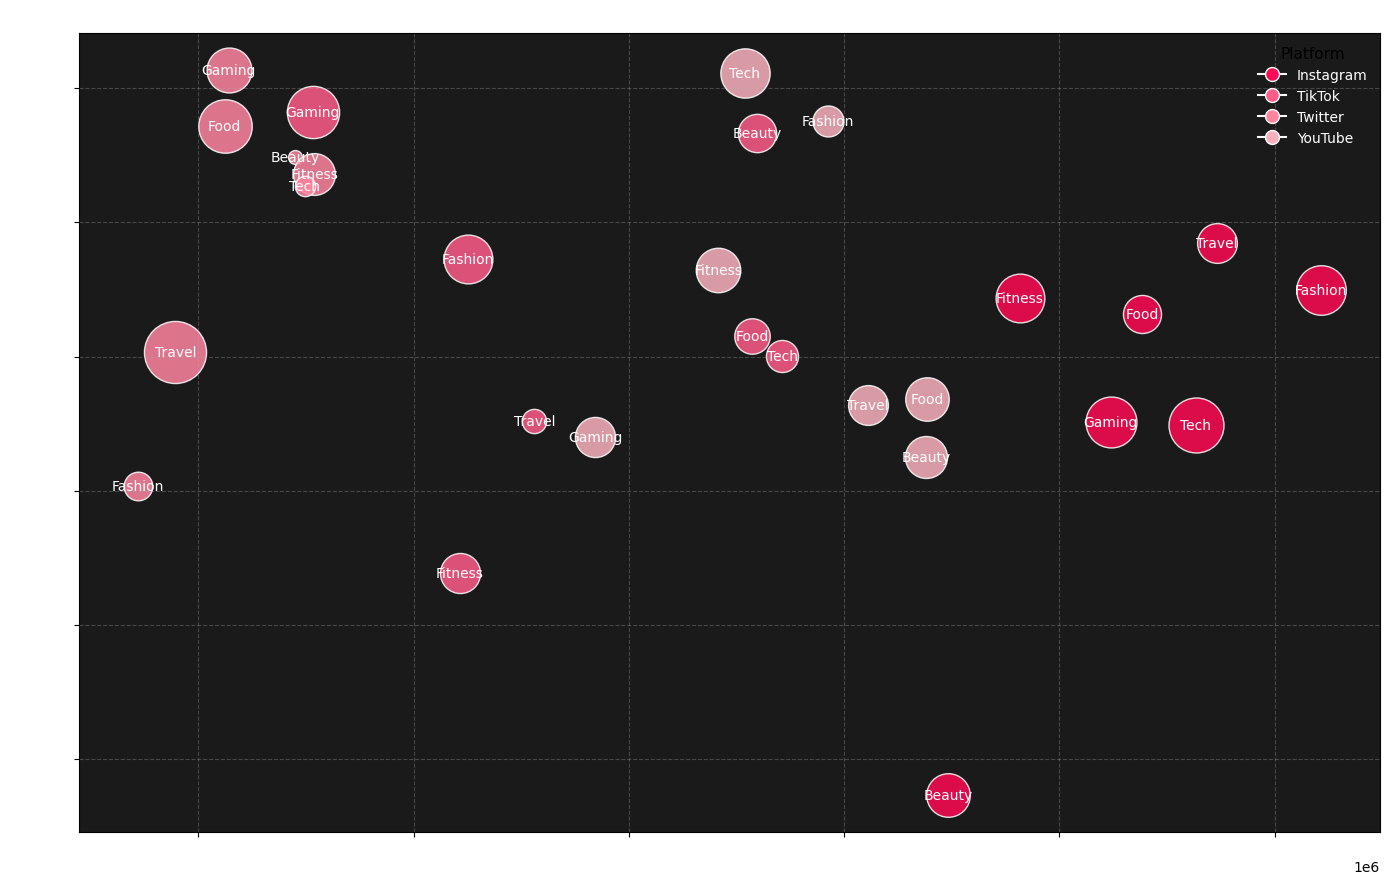

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Your grouped data (example: make sure to run your actual aggregation first)
# Example grouping if needed:
# agg_df = df_cleaned.groupby(['platform', 'influencer_category']).agg({
#     'engagements': 'sum',
#     'product_sales': 'mean',
#     'estimated_reach': 'mean'
# }).reset_index()

# 1. Define custom dark background + pink palette
pink_palette = ['#FF0A54', '#FF5C8A', '#FF85A1', '#FBB1BD']
platforms = agg_df['platform'].unique()
color_map = {platform: pink_palette[i % len(pink_palette)] for i, platform in enumerate(platforms)}

# 2. Bubble size scaling
scaler = MinMaxScaler(feature_range=(100, 2000))
agg_df['bubble_size'] = scaler.fit_transform(agg_df[['estimated_reach']])

# 3. Create plot
plt.figure(figsize=(14, 9))
ax = plt.gca()
ax.set_facecolor('#1a1a1a')  # dark background

# 4. Draw bubbles manually for full control and labels
for _, row in agg_df.iterrows():
    plt.scatter(
        row['engagements'],
        row['product_sales'],
        s=row['bubble_size'],
        alpha=0.85,
        color=color_map[row['platform']],
        edgecolors='white',
        linewidth=1.0
    )
    plt.text(
        row['engagements'],
        row['product_sales'],
        row['influencer_category'],
        fontsize=10,
        color='white',
        ha='center',
        va='center'
    )

# 5. Axis Labels, Title, and Grid
plt.xlabel("Total Engagements", color='white', fontsize=12)
plt.ylabel("Average Product Sales", color='white', fontsize=12)
plt.title("Influencer Campaign Performance by Platform", fontsize=16, color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')

# 6. Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      label=platform,
                      markerfacecolor=color_map[platform],
                      markersize=10) for platform in platforms]
plt.legend(handles=handles, title="Platform", loc='upper right', frameon=False, labelcolor='white', title_fontsize=11)

plt.tight_layout()
plt.show()

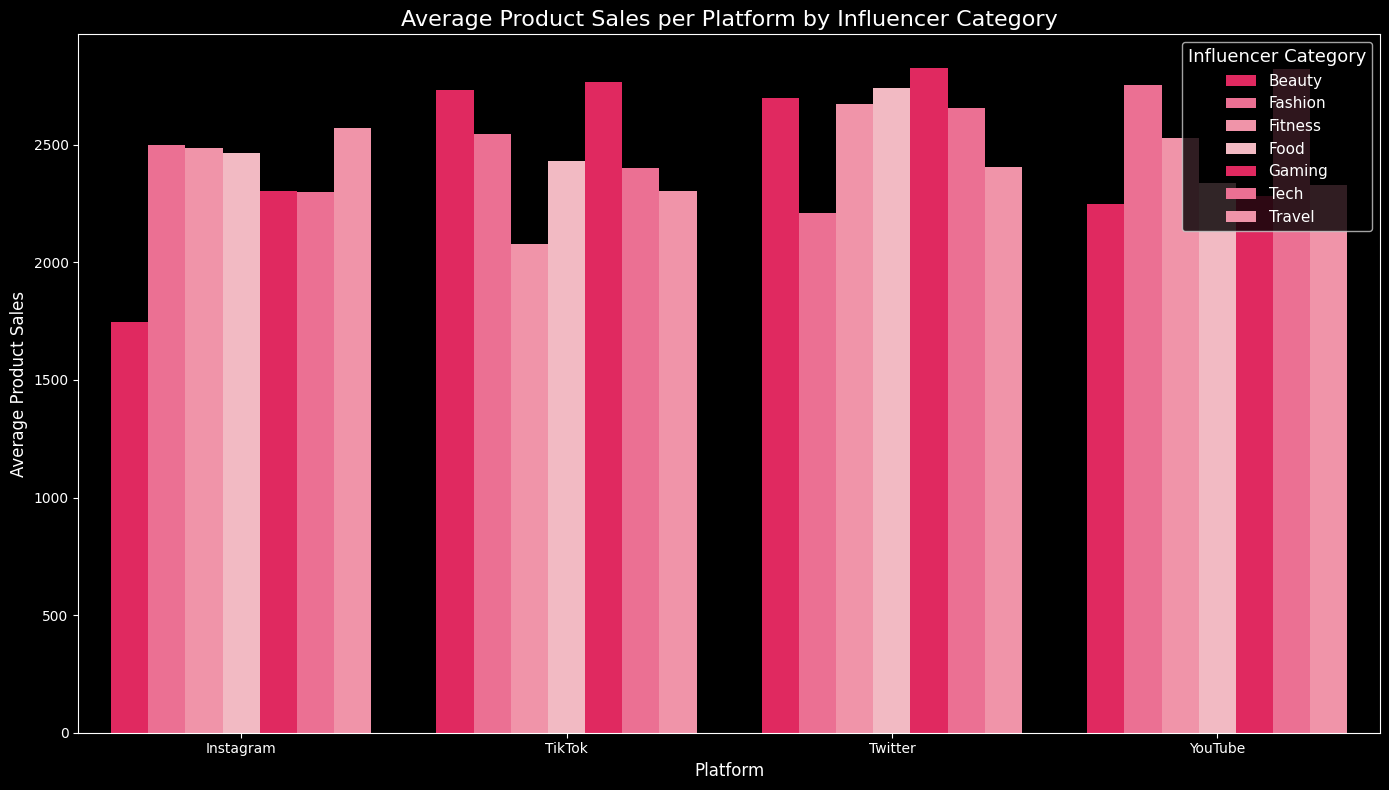

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark style and palette
plt.style.use('dark_background')
pink_palette = ['#FF0A54', '#FF5C8A', '#FF85A1', '#FBB1BD']

plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(
    data=agg_df,
    x='platform',
    y='product_sales',
    hue='influencer_category',
    palette=pink_palette
)

# Title and labels with white color
plt.title("Average Product Sales per Platform by Influencer Category", fontsize=16, color='white')
plt.xlabel("Platform", fontsize=12, color='white')
plt.ylabel("Average Product Sales", fontsize=12, color='white')

# Customize legend
plt.legend(title='Influencer Category', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

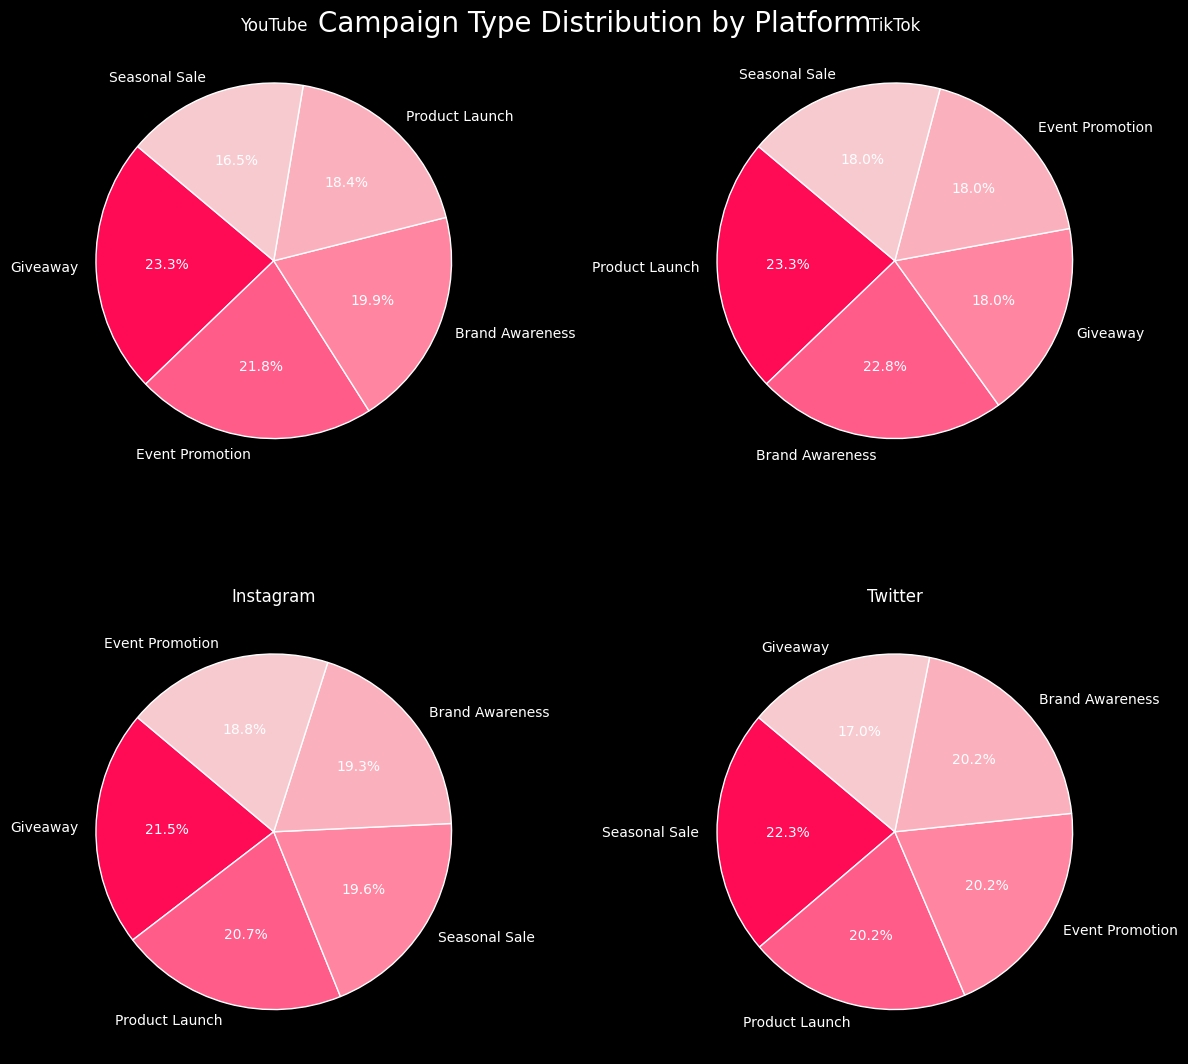

In [33]:
import matplotlib.pyplot as plt

platforms = df_cleaned['platform'].unique()
colors = ['#FF0A54', '#FF5C8A', '#FF85A1', '#FBB1BD', '#F7CAD0']

plt.style.use('dark_background')
plt.figure(figsize=(12, 12))

for i, platform in enumerate(platforms, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    subset = df_cleaned[df_cleaned['platform'] == platform]
    counts = subset['campaign_type'].value_counts()
    plt.pie(
        counts,
        labels=counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'white'},
        textprops={'color': 'white', 'fontsize': 10}
    )
    plt.title(platform, color='white')

plt.suptitle('Campaign Type Distribution by Platform', fontsize=20, color='white', y=0.92)
plt.tight_layout()
plt.show()